<h1 align=center style="color:blue;border:1px dotted">Banknote Authentication using Learning Vector Quantization</h1>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Prepare Data

In [ ]:
df = pd.read_csv('../input/banknote-authentication-uci/BankNoteAuthentication.csv')
df.head()

In [ ]:
sns.pairplot(df, hue="class")

In [ ]:
features = df[['variance', 'skewness', 'curtosis', 'entropy']].values
labels = df[['class']].values.reshape(-1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

# Learning Vector Quantization

## Algorithm

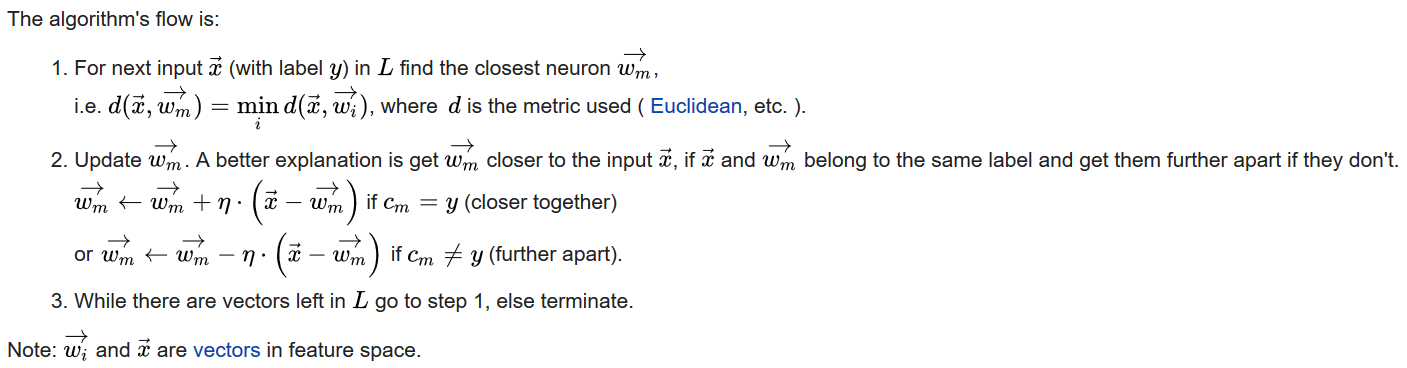

## Euclidian

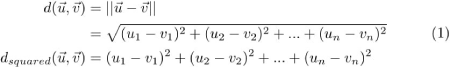

## Implementation

In [ ]:
def euclidian(fvec, alpha):
    prototypes, proto_labels = alpha
    # Compute distance from each prototype to this point
    distances = list(np.sum(np.subtract(fvec, p)**2) for p in prototypes)
    min_dist_index = distances.index(min(distances))

    # Determine winner prototype.
    winner = prototypes[min_dist_index]
    winner_label = proto_labels[min_dist_index]
    
    return winner, winner_label, min_dist_index

In [ ]:
def init_prototype(data, labels):
    labels = labels.astype(int)
    unique_labels = list(set(labels))

    prototypes = np.empty((len(unique_labels), data.shape[1]))
    proto_labels = []

    # Initialize prototypes using class means.
    for i in unique_labels:
        class_data = data[labels == i, :]

        # Compute class mean.
        mean = np.mean(class_data, axis=0)

        prototypes[i] = mean
        proto_labels.append(i)
        
    return prototypes, proto_labels

In [ ]:
def lvq(alpha, X, y, learning_rate):
    prototypes, proto_labels = alpha
    winner, winner_label, min_dist_index = euclidian(X, alpha)
            
    #Push or repel the prototype based on the label.
    sign = 1 if winner_label == y else -1

    # Update winner prototype
    prototypes[min_dist_index] = np.add(prototypes[min_dist_index], np.subtract(X, winner) * learning_rate * sign)
    
    return prototypes

In [ ]:
def validate(X, y, val_err, alpha):
    winner, winner_label, min_dist_index = euclidian(X, alpha)

    # Check if labels match
    if not winner_label == y:
        val_err = val_err + 1
    
    return val_err

In [ ]:
def train_lvq(data, labels, num_epochs, learning_rate, validation_data=None, validation_labels=None):
    # Get init values
    prototypes, proto_labels = init_prototype(data, labels)

    # Loop through data set.
    for epoch in range(0, num_epochs):
        for X, y in zip(data, labels):
            alpha = prototypes, proto_labels
            prototypes = lvq(alpha, X, y, learning_rate)

        # Use validation set to test performance.
        val_err = 0
        if validation_labels is not None:
            for X, y in zip(validation_data, validation_labels):
                alpha = prototypes, proto_labels
                val_err = validate(X, y, val_err, alpha)

            val_err = val_err / len(validation_labels)
            print("Epoch " + str(epoch) + ". Validation error: " + str(val_err))
        else:
            print("Epoch " + str(epoch))


    return (prototypes, proto_labels)

In [ ]:
alpha = train_lvq(X_train, y_train, 10, 0.1, validation_data=X_test, validation_labels=y_test)

# Analyze Trained Prototype

In [ ]:
 def get_accuracy(X, y, alpha):
    wrong = 0
    for i, x in enumerate(X):
        wrong = validate(x, y[i], wrong, alpha)
        
    accuracy = 1 - wrong / len(X)
    return accuracy

In [ ]:
train_accuracy = get_accuracy(X_train, y_train, alpha)
print("Train accuracy: {0:1.3f}".format(train_accuracy))

In [ ]:
test_accuracy = get_accuracy(X_test, y_test, alpha)
print("Train accuracy: {0:1.3f}".format(test_accuracy))

# Conclusion

With just in few epochs, we get a 74.5% accuracy. It shows that the model works but needs improvements.